# Team: Google Play Insights

- Authors: Jing Chen, Beichen Liu, Xinya Yan, Shengsheng Zhou

## Read Data

In [1]:
import pandas as pd
import numpy as np
datafile = "googleplaystore.csv"
df = pd.read_csv(datafile)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- only the Rating column is numerical

In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Preprocessing

#### 1. convert number of reviews to int

In [5]:
# df['Reviews'].astype(int) #error in direct conversion

- since there is an error in direct conversion, there must be entries with non-integer values

In [6]:
import re
p = re.compile('[a-zA-Z]+')
t = df['Reviews'].apply(lambda x: p.search(str(x))!=None)
np.where(t)

(array([10472], dtype=int64),)

- there is one entry with a non-integer value at row 10372

In [7]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

- we see that there is no category for this app, and all cells have been shifted one column left
- we went to https://play.google.com/store/apps/details?id=com.lifemade.internetPhotoframe to find the actual category and updated the original data

In [8]:
df.loc[10472] = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', 1.9, '19', '3.0M', '1000+', 
                 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018', '1.0.19', '4.0 and up']

- now we can convert number of reviews to int successfully

In [9]:
df['Reviews'] = df['Reviews'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int32
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


#### 2. convert size to int

- remove ',' and 'M', 'k' from app size and convert to common unit Megabyte (divide k by 1000)

In [10]:
df['Size'] = df['Size'].apply(lambda x: re.sub(',*M*','',str(x)))
df['Size'] = df['Size'].apply(lambda x: float(re.sub('k*','',str(x)))/1000 if 'k' in str(x) else x)

- remove apps with variable size and save in new df for future use

In [11]:
p = re.compile('[0-9.]+')
non_num_df = df['Size'].apply(lambda x: p.search(str(x))==None)
apps_with_var_size = df[non_num_df]
print(len(apps_with_var_size))
apps_with_var_size.head()

1695


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


- disinclude apps with var size, and convert convert app size to float

In [12]:
df = df[non_num_df==False]
df['Size'] = df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null object
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int32(1), object(10)
memory usage: 964.6+ KB


#### 3. convert num of installs to int

In [13]:
df['Installs'] = df['Installs'].apply(lambda x: re.sub(',*\+*','',str(x)))
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null int32
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int32(2), object(9)
memory usage: 928.9+ KB


#### 4. convert price to float

In [14]:
df['Price'] = df['Price'].apply(lambda x: str(x).strip('$'))
df['Price'] = df['Price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null int32
Type              9146 non-null object
Price             9146 non-null float64
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(3), int32(2), object(8)
memory usage: 928.9+ KB


#### 5. split multiple genres

In [15]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulat

- we find there are multiple genres for a single app, so we should segment the data for analysis

In [16]:
df['Genres'] = df['Genres'].apply(lambda x: str(x).split(';'))
t2 = df['Genres'].apply(lambda x: len(x)>2)
df[t2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- we find that a single app has at most two types of genres, so we add new columns Genre 1 and Genre2 in place of the original column Genres

In [17]:
df['Genre1'] = df['Genres'].apply(lambda x: x[0])
df['Genre2'] = df['Genres'].apply(lambda x: x[1] if len(x)>1 else None)

In [18]:
df.drop('Genres',axis=1,inplace=True)

In [19]:
df['Genre1'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Strategy',
       'Action', 'Puzzle', 'Sports', 'Word', 'Racing', 'Simulation',
       'Board', 'Trivia', 'Role Playing', 'Educational', 'Music',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [20]:
df['Genre2'].unique()

array([None, 'Pretend Play', 'Creativity', 'Action & Adventure',
       'Education', 'Brain Games', 'Music & Video'], dtype=object)

- There are very few types of Genre2, which are subsets of Genre1, so we drop the Genre2 column

In [21]:
df.drop('Genre2',axis=1,inplace=True)

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design


#### 6. Convert last updated to datetime

In [23]:
import datetime
df['Last Updated'] = df['Last Updated'].apply(lambda x:datetime.datetime.strptime(x,'%B %d, %Y'))

## Exploring meaningfulless of data

- does it make sense to keep data where installs and reviews are 0?

In [24]:
sum(np.where(df['Installs']==0,1,0))

14

In [25]:
'%1.5f%%'%(sum(np.where(df['Installs']==0,1,0))*100/len(df))

'0.15307%'

In [26]:
sum(np.where(df['Reviews']==0,1,0))

557

In [27]:
'%1.5f%%'%(sum(np.where(df['Reviews']==0,1,0))*100/len(df))

'6.09009%'

- since the records where installs are 0 make up only 0.15307% of total data, we will remove them
- we will need to take a closer look at records with no reviews and the distribution of installs

In [28]:
df = df[df['Installs']!=0]

In [29]:
pd.concat([df[df['Reviews']==0]['Rating'],df[df['Reviews']==0]['Installs']],axis=1)

,Rating,Installs
478,NaN,50
479,NaN,100
621,NaN,50
623,NaN,50
627,NaN,500
628,NaN,100
630,NaN,10
632,NaN,10
635,NaN,10
639,NaN,10


- We can see that for apps with 0 reviews, their ratings are also 0, which does not contribute to our final analysis because of insignificant user base.
- Therefore, we also remove columns with no ratings/reviews

In [30]:
df = df.dropna(axis=0,how='any')

#### Preliminary data plot analysis

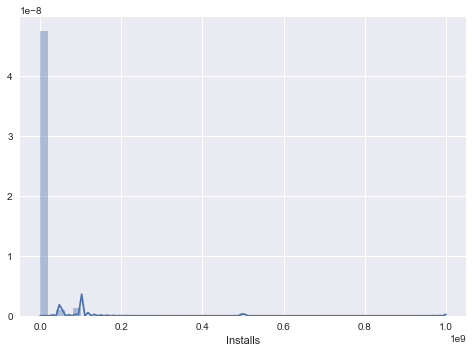

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.distplot(df['Installs'])

- the data is too widely distributed on initial plotting distribution, so we take the log of df['Installs']

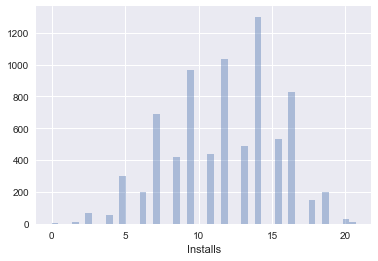

In [32]:
x = np.log(df['Installs'])
sns.distplot(x,kde = False)

## Basic data analysis

#### 1. Market share of apps

- Since we only want to see categories that really matters, we don't really need categories that count for less than 1% market, so we combine all categories that less than 1% and form a "OTHER" group to hold them

In [33]:
appNum_by_categorys = df['Category'].value_counts().sort_values(ascending = False)
app_under_1percent = appNum_by_categorys[-10:]
appNum_by_categorys = appNum_by_categorys[:-10]
appNum_by_categorys.loc['OTHER'] = sum(x for x in app_under_1percent )

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import colorlover as cl
from IPython.display import HTML

rdbu = cl.scales['11']['div']['RdBu']
bupu = cl.scales['9']['seq']['Oranges']
blues = cl.scales['9']['seq']['Blues']

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [go.Pie(
        labels = appNum_by_categorys.index,
        values = appNum_by_categorys.values,
        hoverinfo = 'label+value',
        marker=dict(colors = blues + bupu + rdbu)
)],
    "layout": go.Layout(title="Market Share of apps by Category")
})

#### 2. Relation between category and ratings

- distribution of app ratings

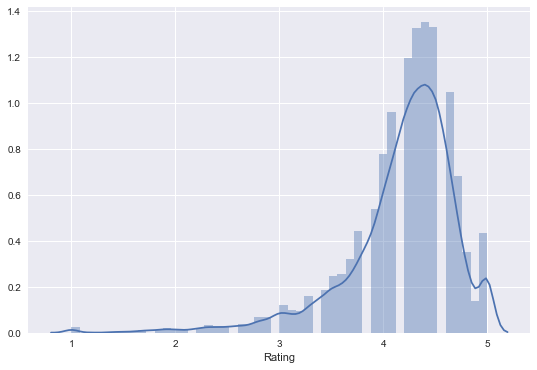

In [35]:
plt.figure(figsize=(9,6))
sns.distplot(df['Rating'])

In [36]:
## Initialize dateframe of category vs rating
category = list(df.Category.unique())
average_ratings = []
for item in category:
    i = df[df.Category == item]
    avg_rating = i.Rating.sum()/len(i)
    average_ratings.append(avg_rating)
cate_rate = pd.DataFrame({'Category':category,'Average Rating':average_ratings})

In [37]:
## Sort dateframe by rating
cate_rate = cate_rate.sort_values(by = ['Average Rating'], ascending = False)

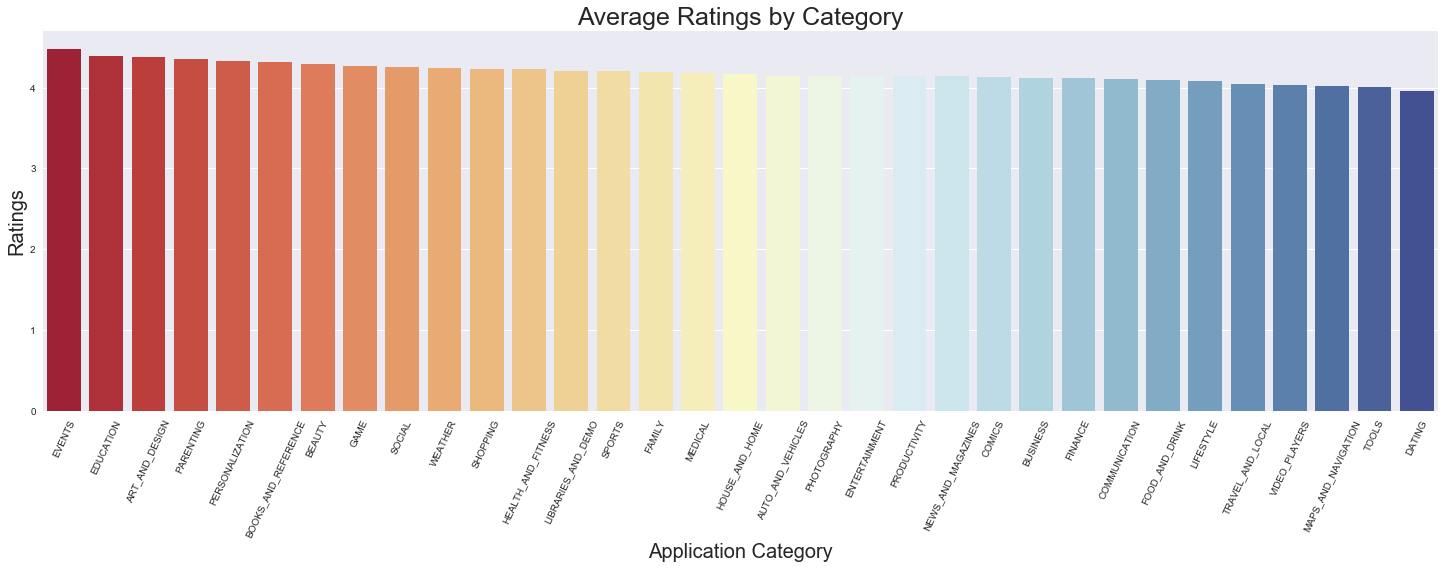

In [38]:
plt.figure(figsize=(25,7))
sns.barplot(x=cate_rate.Category, y=cate_rate['Average Rating'], palette="RdYlBu")

plt.xticks(rotation = 65)
plt.xlabel('Application Category', fontsize=20)
plt.ylabel('Ratings',fontsize=20)
plt.title('Average Ratings by Category',fontsize=25)
plt.show()

In [39]:
avg_rating = df['Rating'].mean()
avg_rating

4.173640600725016

- closer look into average rating by genre (narrower segmentation than category)

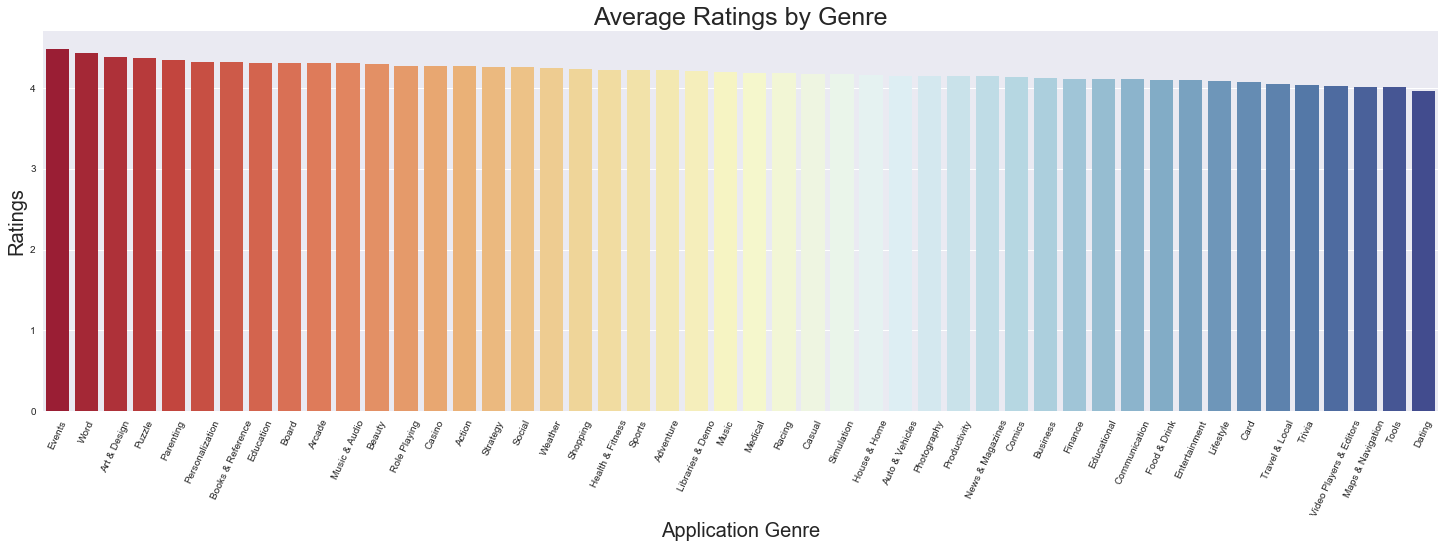

In [40]:
## Initialize dateframe of genre vs rating
genre = list(df.Genre1.unique())
average_ratings = []
for item in genre:
    i = df[df.Genre1 == item]
    avg_rating = i.Rating.sum()/len(i)
    average_ratings.append(avg_rating)
genre_rate = pd.DataFrame({'Genre': genre,'Average Rating':average_ratings})
## Sort dateframe by rating
genre_rate = genre_rate.sort_values(by = ['Average Rating'], ascending = False)
##plot
plt.figure(figsize=(25,7))
sns.barplot(x=genre_rate.Genre, y=genre_rate['Average Rating'], palette="RdYlBu")

plt.xticks(rotation = 65)
plt.xlabel('Application Genre', fontsize=20)
plt.ylabel('Ratings',fontsize=20)
plt.title('Average Ratings by Genre',fontsize=25)
plt.show()

#### 3. Relations between each attributes
##### 3.1 Size influence

In [41]:
all_ratings = df['Rating']
all_size = df['Size']
all_installs = df['Installs']
p = df['Reviews']
all_type = df['Type']
all_price = df['Price']

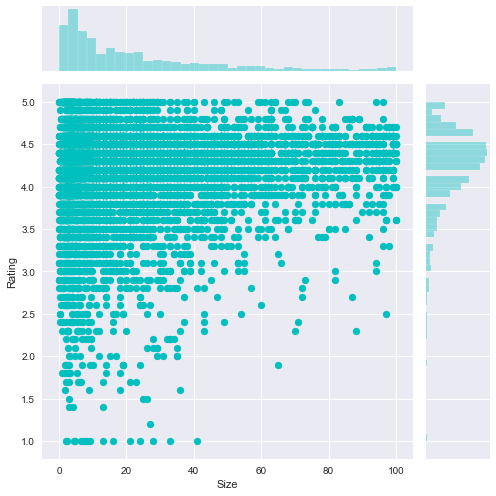

In [42]:
sns.set_style("darkgrid")
ax = sns.jointplot(all_size,all_ratings,height=7, color = 'c')

- Kernel density estimation for to visualize bivariate distribution

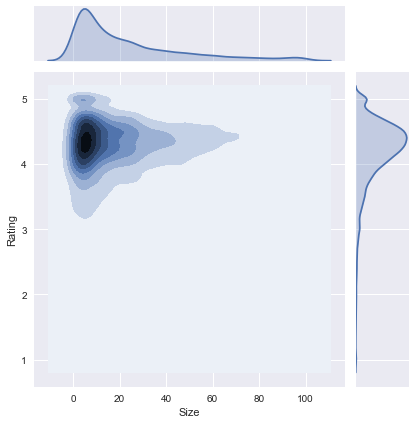

In [43]:
sns.jointplot(x=all_size, y=all_ratings, data=df, kind="kde");

- Since the relation is not that clear through this plot, let's break down to the top 3 category
##### 1. Family

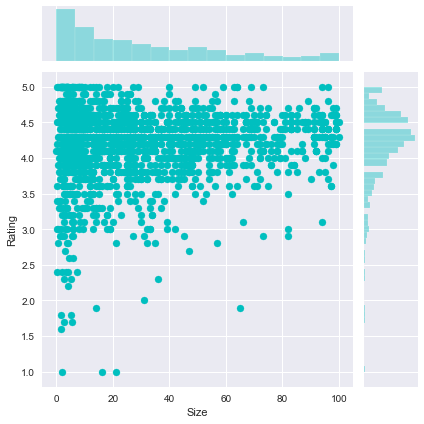

In [44]:
family_rating = df[df.Category == 'FAMILY']['Rating']
family_size = df[df.Category == 'FAMILY']['Size']
family_installs = df[df.Category == 'FAMILY']['Installs']
family_price = df[df.Category == 'FAMILY']['Price']
sns.set_style("darkgrid")
ax = sns.jointplot(family_size,family_rating, height=6, color = 'c')

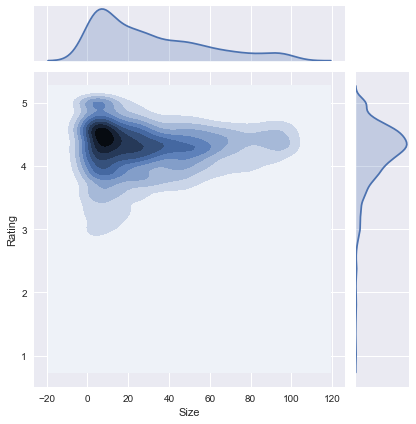

In [45]:
sns.jointplot(x=family_size, y=family_rating, data=df, kind="kde");

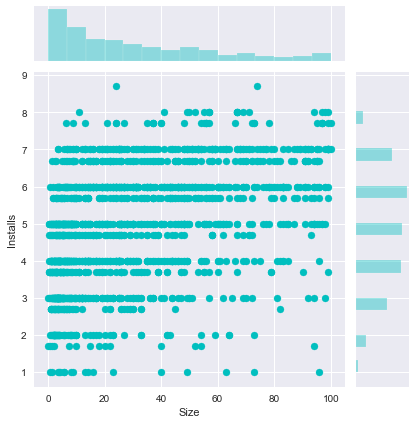

In [46]:
sns.set_style("darkgrid")
ax = sns.jointplot(family_size, np.log10(family_installs), height=6, color = 'c')

##### 2. Game

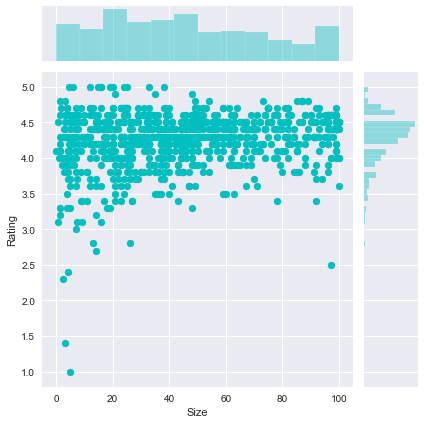

In [47]:
game_rating = df[df.Category == 'GAME']['Rating']
game_size = df[df.Category == 'GAME']['Size']
game_installs = df[df.Category == 'GAME']['Installs']
game_price = df[df.Category == 'GAME']['Price']
sns.set_style("darkgrid")
ax = sns.jointplot(game_size,game_rating, height=6, color = 'c')

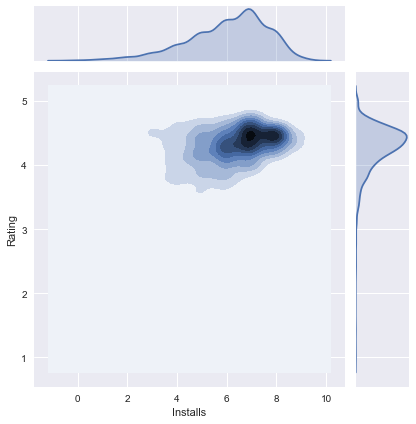

In [48]:
sns.jointplot(x=np.log10(game_installs), y=game_rating, data=df, kind="kde");

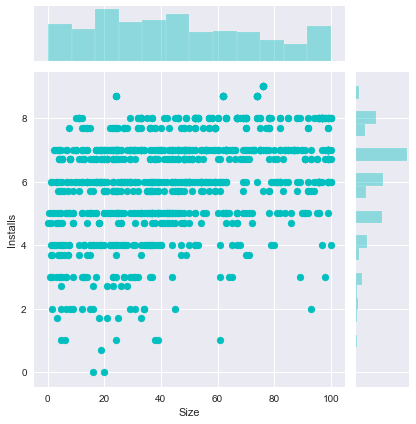

In [49]:
sns.set_style("darkgrid")
ax = sns.jointplot(game_size, np.log10(game_installs), height=6, color = 'c')

##### 3. Tools

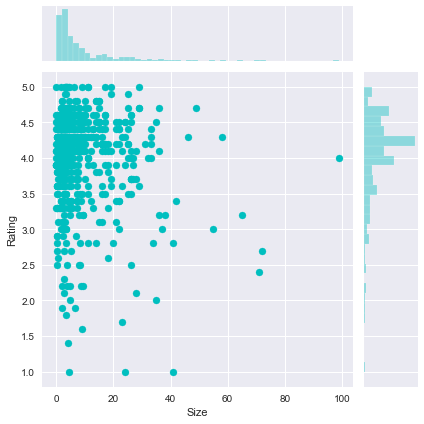

In [50]:
tools_ratings = df[df.Category == 'TOOLS']['Rating']
tools_size = df[df.Category == 'TOOLS']['Size']
tools_installs = df[df.Category == 'TOOLS']['Installs']
tools_price = df[df.Category == 'TOOLS']['Price']
sns.set_style("darkgrid")
ax = sns.jointplot(tools_size, tools_ratings, height=6, color = 'c')

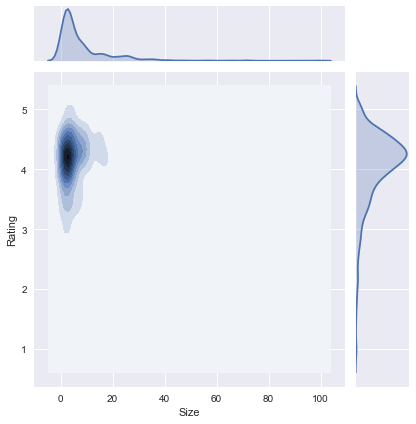

In [51]:
sns.jointplot(x=tools_size, y=tools_ratings, data=df, kind="kde");

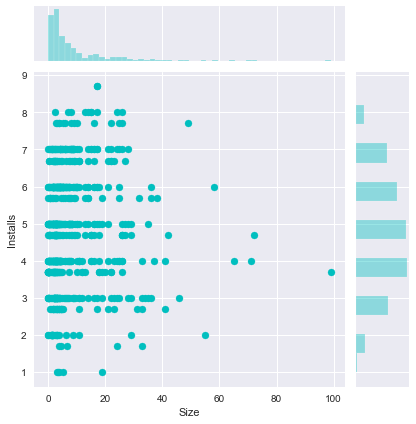

In [52]:
sns.set_style("darkgrid")
ax = sns.jointplot(tools_size, np.log10(tools_installs), height=6, color = 'c')

Conclusion:
1.	Apps that have a lower rating are more likely to have a small size, and small-sized apps and have more installs than large-size apps
2.	Apps in Medical and Family category are most expensive
3.	Paid apps are installed less than free apps, but they are more likely to be highly rated


##### 3.2 Price

In [53]:
under_200_all = df[df.Price < 200]

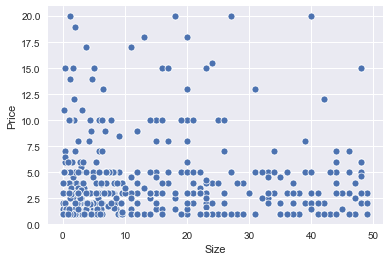

In [54]:
paid = df[(df['Type']!='Free') & (df['Price']<20) & (df['Size']<50)]
sns.scatterplot(paid['Size'],paid['Price'])

In [55]:
# function to categorize continuous input col into 10 indexes
def catbins(df,col, bins):
    d = {}
    num = 0
    u = df[col].unique()
    u.sort()
    u_dict = {}
    start = min(u)
    end = start+(max(u)-min(u))/bins
    for i in range(bins):
        u_dict[i]=[start,end]
        start=end
        end+=(max(u)-min(u))/bins
    for i in df[col].unique():
        for j in u_dict.keys():
            if u_dict[j][1]>=i >= u_dict[j][0]:
                d[i]=j        
    new_df = df[col].apply(lambda x: d[x])
    return new_df

In [56]:
paid['size_ind'] = catbins(paid,'Size',50)

C:\Users\shery\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



- average app price based on size category (25 bins between 0 and 50 MB for paid apps <20 USD)
- Apps between 28-38 MB have the lowest average price of $2-$4

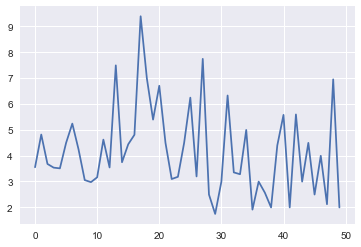

In [57]:
def calc(df,i):
    x = df[df['size_ind']==i]['Price']
    return sum(x)/len(x)
l=[]
for i in range(50):
    l.append(calc(paid,i))

sns.lineplot(range(0,50),l)

- average app installs based on size category (5 bins between 0 and 50 MB for paid apps <20 USD)
- Apps around 30MB have five times the number of average installs compared to other sizes (between 0-50MB)


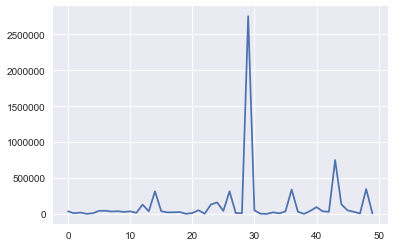

In [58]:
def calc(df,i):
    x = df[df['size_ind']==i]['Installs']
    return sum(x)/len(x)

l=[]
for i in range(50):
    l.append(calc(paid,i))

sns.lineplot(range(0,50),l)

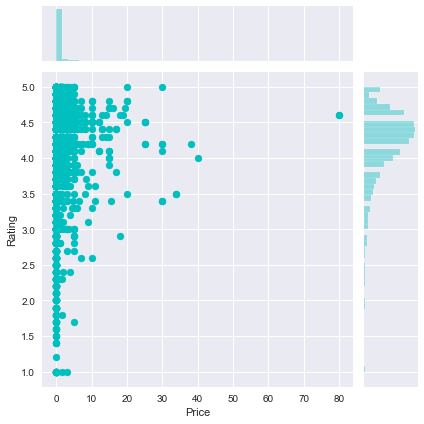

In [59]:
sns.set_style("darkgrid")
ax = sns.jointplot(under_200_all.Price, under_200_all.Rating, height=6, color = 'c')

- Most of the apps are priced in between 0-40$
- There is no obvious relation that can be found from the image, but it can be told that apps with low ratings are more likely be apps with small size
- Apps with smaller size are more popular than apps with large size in general

In [60]:
df['Category'].value_counts()[:10].keys()

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'LIFESTYLE', 'PERSONALIZATION',
       'FINANCE', 'SPORTS', 'BUSINESS', 'PHOTOGRAPHY'],
      dtype='object')

In [61]:
top_10_df = df[(df['Category'] == 'FAMILY' ) | (df['Category'] == 'GAME') | (df['Category'] == 'TOOLS') 
   | (df['Category'] == 'MEDICAL') | (df['Category'] == 'LIFESTYLE') | (df['Category'] == 'PERSONALIZATION')
   | (df['Category'] == 'FINANCE') | (df['Category'] == 'SPORTS') | (df['Category'] == 'BUSINESS') 
   | (df['Category'] == 'PHOTOGRAPHY')]
under_200_top10df = top_10_df[top_10_df.Price < 200]

[Text(0,0,'BUSINESS'),
 Text(0,0,'FINANCE'),
 Text(0,0,'LIFESTYLE'),
 Text(0,0,'GAME'),
 Text(0,0,'FAMILY'),
 Text(0,0,'MEDICAL'),
 Text(0,0,'PHOTOGRAPHY'),
 Text(0,0,'SPORTS'),
 Text(0,0,'TOOLS'),
 Text(0,0,'PERSONALIZATION')]

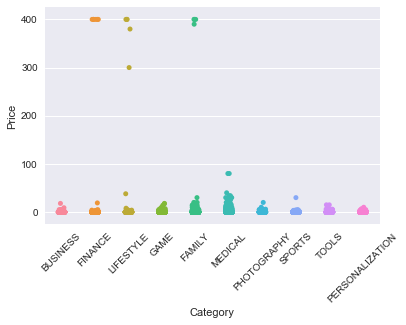

In [62]:
price_by_cate = sns.stripplot(x="Category", y="Price", data=top_10_df)
price_by_cate.set_xticklabels(price_by_cate.get_xticklabels(), rotation=45)

[Text(0,0,'BUSINESS'),
 Text(0,0,'FINANCE'),
 Text(0,0,'LIFESTYLE'),
 Text(0,0,'GAME'),
 Text(0,0,'FAMILY'),
 Text(0,0,'MEDICAL'),
 Text(0,0,'PHOTOGRAPHY'),
 Text(0,0,'SPORTS'),
 Text(0,0,'TOOLS'),
 Text(0,0,'PERSONALIZATION')]

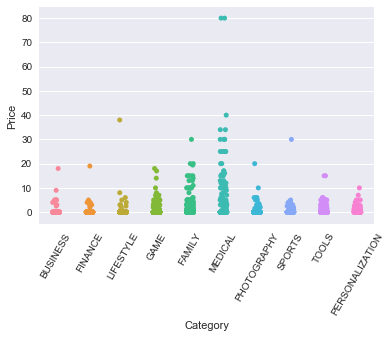

In [63]:
price_by_cate_under200 = sns.stripplot(x="Category", y="Price", data=under_200_top10df)
price_by_cate_under200.set_xticklabels(price_by_cate.get_xticklabels(), rotation=60)

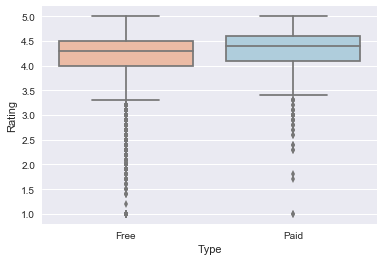

In [64]:
sns.boxplot(x="Type", y="Rating", data=df, palette="RdBu")

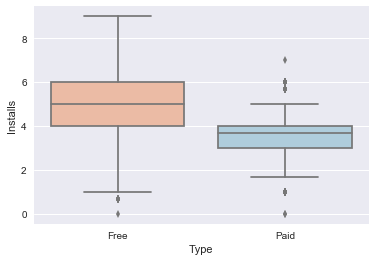

In [65]:
sns.boxplot(all_type, np.log10(all_installs), data=df, palette="RdBu")

## Machine Learning and Rating Prediction Models

- Examine correlations

In [66]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079815,0.084002,0.052724,-0.021261
Reviews,0.079815,1.000000,0.240388,0.626189,-0.010182
Size,0.084002,0.240388,1.000000,0.162717,-0.026264
Installs,0.052724,0.626189,0.162717,1.000000,-0.010851
Price,-0.021261,-0.010182,-0.026264,-0.010851,1.000000


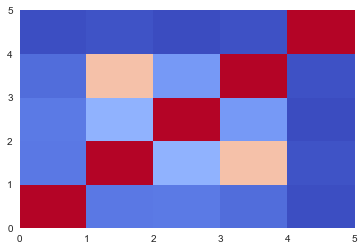

In [67]:
plt.pcolor(df.corr(),cmap='coolwarm')
plt.show()

- convert rating to binary states: above 4.5 and below 4.5

In [68]:
rating_bin = df['Rating'].apply(lambda x: 1 if x>4.5 else 0)
sum(rating_bin)/len(rating_bin)

0.21206628689798032

#### Data preparation

<li>convert category to int

In [69]:
category_dict = {}
category_num = 0
for category in df['Category'].unique():
    category_dict[category] = category_num
    category_num += 1

df['Category_num'] = df['Category'].apply(lambda x: str(category_dict[x]))

<li>get dummies

In [70]:
category_df = df['Category_num'].str.get_dummies()

<li>identify input and output

In [71]:
X = df[['Size', 'Price']].join(category_df)
Y = df['Rating']

#### 1. Linear Regression
##### a) Binary Linear Regression

<li>split into train set and test set

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=1)

- we create a training and testing dataset, then separate out the target value 'Rating' for each set

In [73]:
from sklearn.model_selection import train_test_split
# df_num = pd.concat([rating_bin,df['Reviews'],df['Size'],df['Installs'],df['Price']],axis=1)
df_num = pd.concat([rating_bin,df['Reviews'],df['Installs']],axis=1)
# df_num = pd.concat([rating_bin,df['Installs']],axis=1)
train, test = train_test_split(df_num, test_size = 0.3) #splits randomly
x_train = train.iloc[0:,1:]
y_train = train['Rating']
x_test = test.iloc[0:,1:]
y_test = test['Rating']

- create linear regression model object and fit data

In [74]:
from sklearn import linear_model 
model = linear_model.LinearRegression() #create model obj (may include hyperparam)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- view predictions

In [75]:
testing_predictions  = model.predict(x_test)
testing_predictions

array([0.21145366, 0.21425284, 0.21425311, ..., 0.22125234, 0.21425316,
       0.21436954])

- decide on a threshold value that decides whether its 1 or 0 for each case

In [76]:
def get_classification(predictions,threshold):
    classes = np.zeros_like(testing_predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

thresh = 0.21206628689798032
x = get_classification(testing_predictions,thresh)
x

array([0., 1., 1., ..., 1., 1., 1.])

<li>evaluate model with confusion matrix</li>
1. <span style="color:blue">true positive</span>: model predicts a rating greater than 4.5 and rating is greater than 4.5
2. <span style="color:blue">false positive</span>: model predicts a rating greater than 4.5 and but rating is less 4.5
3. <span style="color:blue">true negative</span>: model predicts a rating less than 4.5 and rating is actually less than 4.5
4. <span style="color:blue">false negative</span>: model predicts a rating less than 4.5 but rating is greater than 4.5

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,get_classification(testing_predictions,thresh))

array([[ 272, 1561],
       [  30,  455]], dtype=int64)

In [78]:
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,thresh)).ravel()
print(tn, fp, fn, tp)

272 1561 30 455


- True Positive rate/sensitivity/recall: proportion of positive cases that are correctly identified as positive
$$ tpr = \frac{tp}{(tp + fn)} $$

In [79]:
tpr = tp/(tp+fn)
print("Percentage of apps with rating greater than 4.5 correctly identified:",tpr)

Percentage of apps with rating greater than 4.5 correctly identified: 0.9381443298969072


- True Negative Rate: proportion of negative cases correctly identified as negative
$$ tpr = \frac{tn}{(tn + fp)} $$

In [80]:
tnr = tn/(tn+fp)
print("Percentage of apps with rating less than 4.5 correctly identified:",tnr)

Percentage of apps with rating less than 4.5 correctly identified: 0.14839061647572285


- aggregate results

In [81]:
def rating_analysis(true,pred,threshold):
    tn, fp, fn, tp = confusion_matrix(true,get_classification(pred,threshold)).ravel()
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = 2*precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as rating greater than 4.5 are correct"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of actual rating greater than 4.5 apps identified"%(tpr))
    print("False Positive Rate:\t\t%1.2f proportion of rating less than 4.5 identified as greater than 4.5"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))

rating_analysis(y_test,testing_predictions,thresh)

Precision:			0.23 identified as rating greater than 4.5 are correct
Recall/TPR:			0.94 proportion of actual rating greater than 4.5 apps identified
False Positive Rate:		0.85 proportion of rating less than 4.5 identified as greater than 4.5
f-score:			0.36 tradeoff between precision and recall
Accuracy:			0.31 how well the model has classified


- draw roc curve

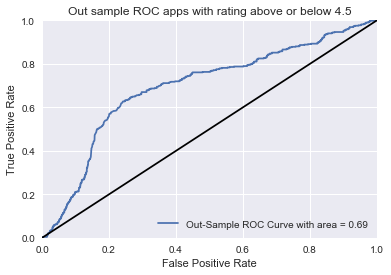

In [82]:
from sklearn.metrics import roc_curve, auc
testing_predictions = model.predict(x_test)
(fpr, tpr, thresholds) = roc_curve(y_test,testing_predictions)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC apps with rating above or below 4.5')
plt.legend(loc="lower right")
plt.show()

##### b) Continuous Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
print(linreg.intercept_)
print(linreg.coef_)

15831542909.376146
[ 1.48608248e-03 -3.21720708e-04 -1.58315429e+10 -1.58315429e+10
 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10
 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10
 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10
 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10
 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10
 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10
 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10
 -1.58315429e+10 -1.58315429e+10 -1.58315429e+10]


In [84]:
y_pred = linreg.predict(X_test)
from sklearn import metrics

print("MSE:", metrics.mean_squared_error(Y_test, y_pred))

MSE: 0.2866250495233798


In [85]:
pre_df=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
pre_df[:10]

,Actual,Predicted
2882,4.4,4.233791
2667,4.4,4.232748
3669,3.6,4.084272
6197,4.5,3.992983
8146,5.0,4.284391
5647,3.8,4.284714
8107,4.2,4.298088
517,3.9,3.915964
9812,4.6,4.152601
9164,4.1,4.207533


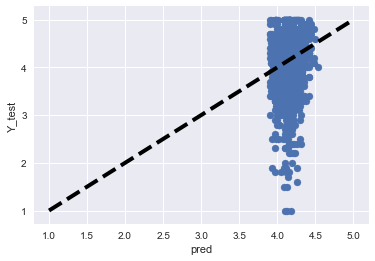

In [86]:
fig, ax = plt.subplots()
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.scatter(y_pred, Y_test)
plt.xlabel('pred')
plt.ylabel('Y_test')
plt.show()

<li> 10-cross-validation

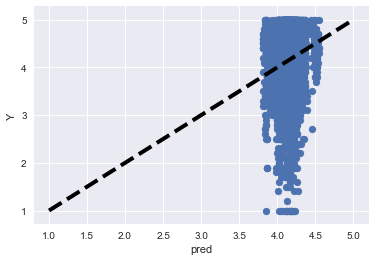

In [87]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
predicted = cross_val_predict(linreg,X,Y,cv=10)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.scatter(predicted, Y)
plt.xlabel('pred')
plt.ylabel('Y')
plt.show()

In [88]:
print("MSE:", metrics.mean_squared_error(Y, predicted))

MSE: 0.3018058705155106


#### 2. Decision Trees

#### a) Continuous: R-squared

In [89]:
# function to categorize input col into indexes
def categorize(df,col):
    d = {}
    num = 0
    u = df[col].unique()
    if col == 'Rating' or col == 'Reviews':
        u.sort()
        u_dict = {}
        start = min(u)
        end = start+(max(u)-min(u))/5
        for i in range(5):
            u_dict[i]=[start,end]
            start=end
            end+=(max(u)-min(u))/5
        for i in df[col].unique():
            for j in u_dict.keys():
                if u_dict[j][1]>=i >= u_dict[j][0]:
                    d[i]=j        
    else:
        for i in df[col].unique():
            d[i] = num
            num += 1
    new_df = df[col].apply(lambda x: d[x])
    return new_df

category = categorize(df,'Category')
rating = df['Rating']
reviews=df['Reviews']
size = df['Size']
installs = df['Installs']
app_type = categorize(df,'Type')
price = df['Price']
content_rating = categorize(df,'Content Rating')
genre1 = categorize(df,'Genre1')

df_num = pd.concat([rating,reviews,size,installs,price],axis=1)

- create training and testing sets

In [90]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_num, test_size = 0.3)
x_train = train.iloc[0:,1:]
y_train = train[['Rating']]
x_test = test.iloc[0:,1:]
y_test = test[['Rating']]

- create decision tree

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [92]:
#Get the R-Square for the predicted vs actuals on the text sample
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.1106352407804313
Testing R-Square 0.07138136668875295


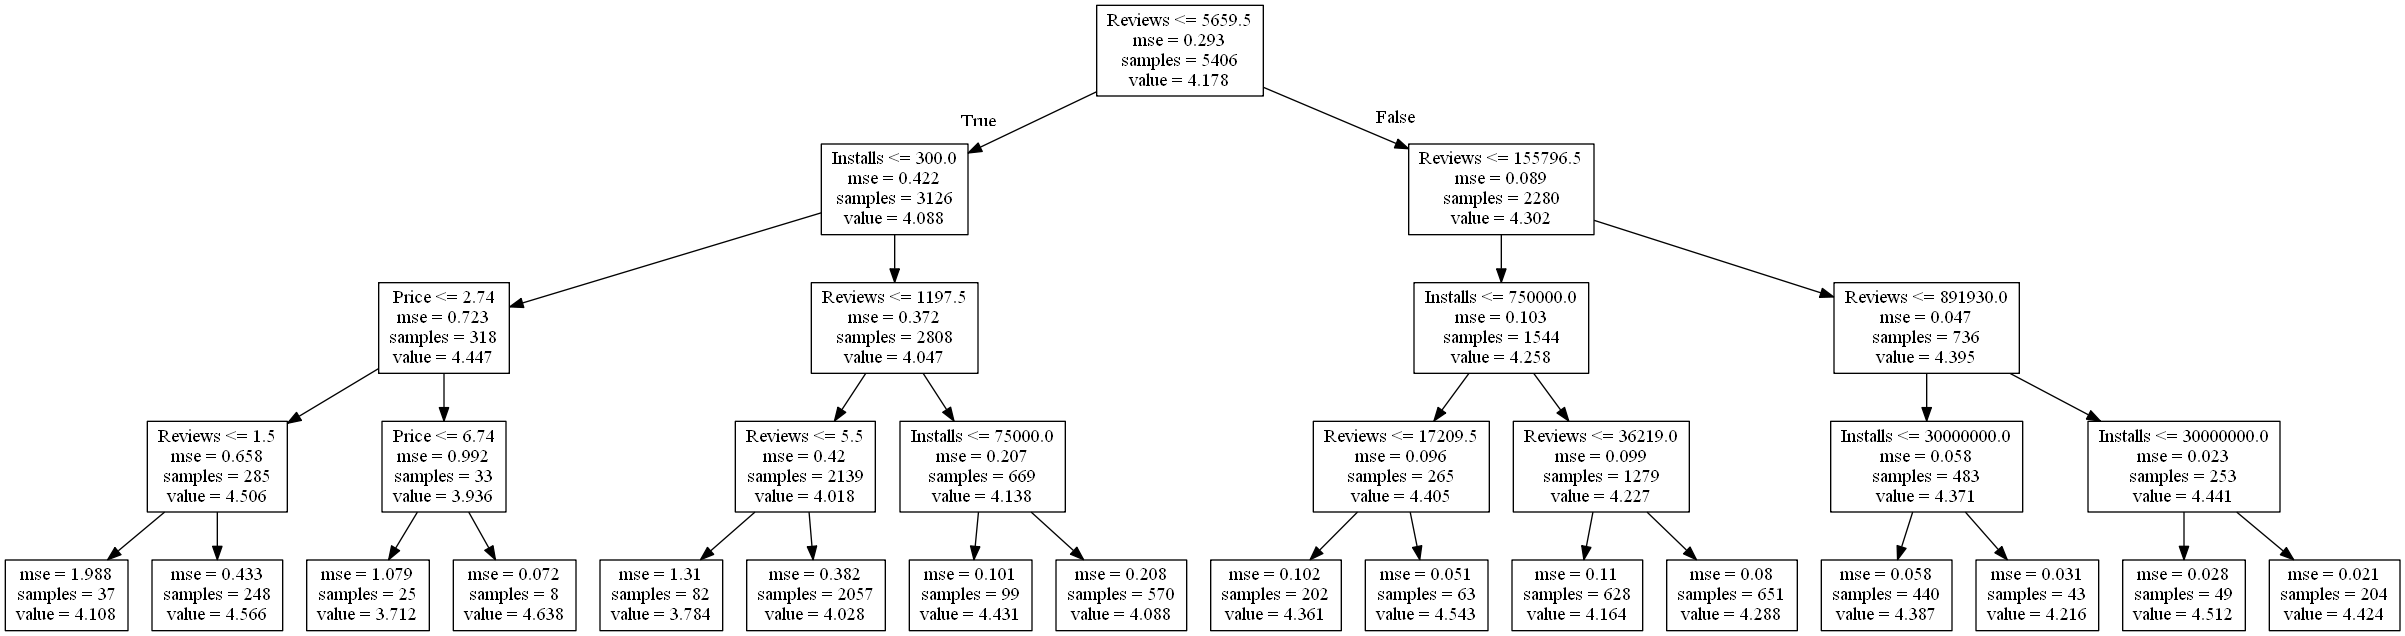

In [93]:
feature_names = [key for key in df_num if not key=='Rating']
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

##### b) Classification Trees and Entropy

In [94]:
category = categorize(df,'Category')
rating = categorize(df,'Rating')
reviews = categorize(df,'Reviews')
size = categorize(df,'Size')
installs = categorize(df,'Installs')
app_type = categorize(df,'Type')
price = categorize(df,'Price')
content_rating = categorize(df,'Content Rating')
genre1 = categorize(df,'Genre1')

df_num = pd.concat([rating,category,reviews,size,installs,app_type,price,content_rating,genre1],axis=1)

In [95]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_num, test_size = 0.3)
x_train = train.iloc[0:,1:]
y_train = train[['Rating']]
x_test = test.iloc[0:,1:]
y_test = test[['Rating']]

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.6270810210876804
Testing R-Square 0.6298533218291631


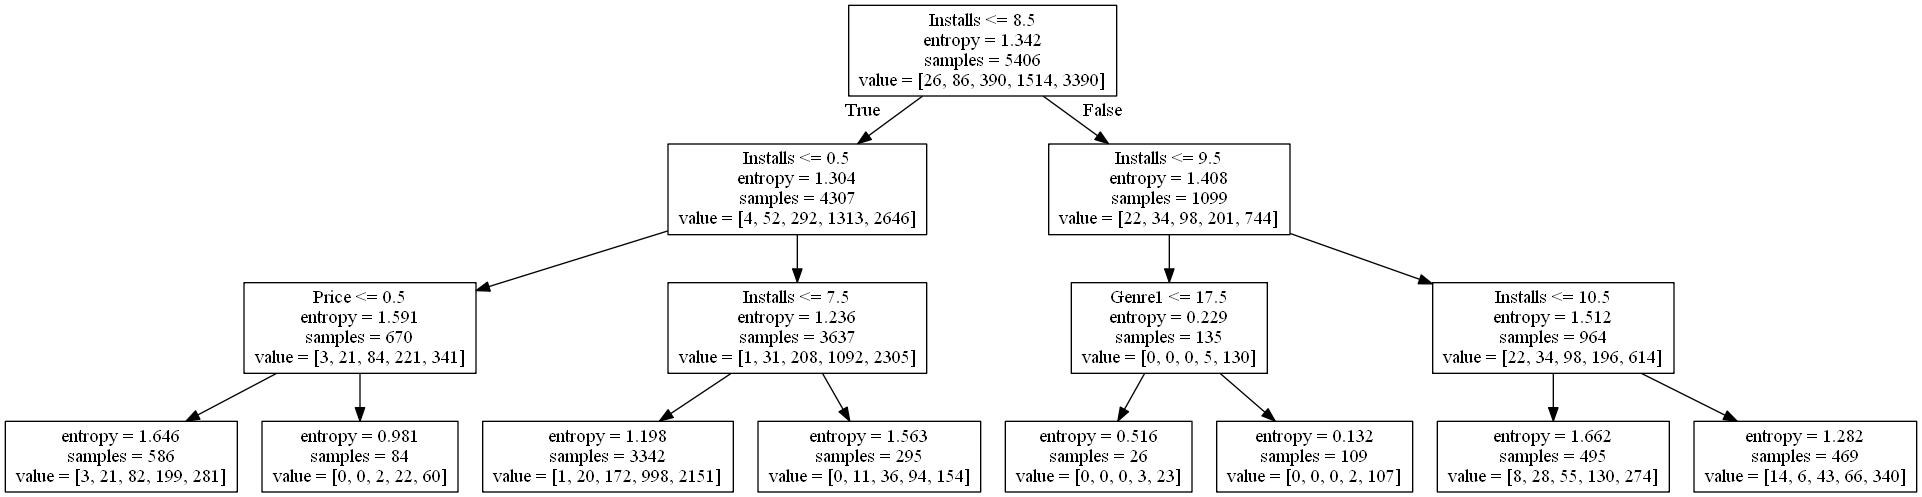

In [98]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in df_num if not key == 'Rating']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names) 
#graph = pydotplus.graph_from_dot_data(dot_data) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

##### c) Continuous: MSE

In [99]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)  

In [100]:
from sklearn import metrics

print("MSE:", metrics.mean_squared_error(Y_test, y_pred))

MSE: 0.4120904788904489


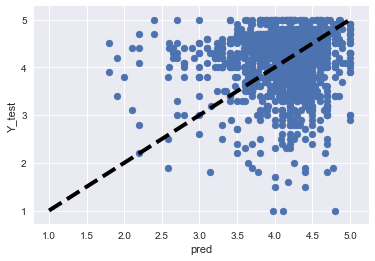

In [101]:
fig, ax = plt.subplots()
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.scatter(y_pred, Y_test)
plt.xlabel('pred')
plt.ylabel('Y_test')
plt.show()

In [102]:
tree_pre_df=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred}) 
tree_pre_df[:10]

,Actual,Predicted
2882,4.4,4.500
2667,4.4,4.200
3669,3.6,3.700
6197,4.5,4.340
8146,5.0,4.250
5647,3.8,4.500
8107,4.2,4.300
517,3.9,4.075
9812,4.6,4.660
9164,4.1,4.550


<li>10-cross-validation

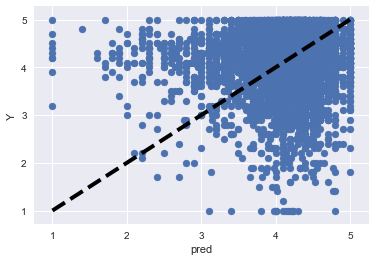

In [103]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
predicted = cross_val_predict(regressor,X,Y,cv=10)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.scatter(predicted, Y)
plt.xlabel('pred')
plt.ylabel('Y')
plt.show()

In [104]:
print("MSE:", metrics.mean_squared_error(Y, predicted))

MSE: 0.47712765523805434


#### 3. Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

- accuracy before adjusting paramaters through GridSearchCV

In [106]:
model.score(x_test,y_test)

0.5836928386540121

In [107]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[   0,    0,    0,    2,    7],
       [   0,    3,    2,    7,   14],
       [   1,    2,   19,   50,   78],
       [   1,    4,   39,  250,  379],
       [   7,    9,   57,  306, 1081]], dtype=int64)

- feature importance

Text(0.5,0,'Relative Importance')

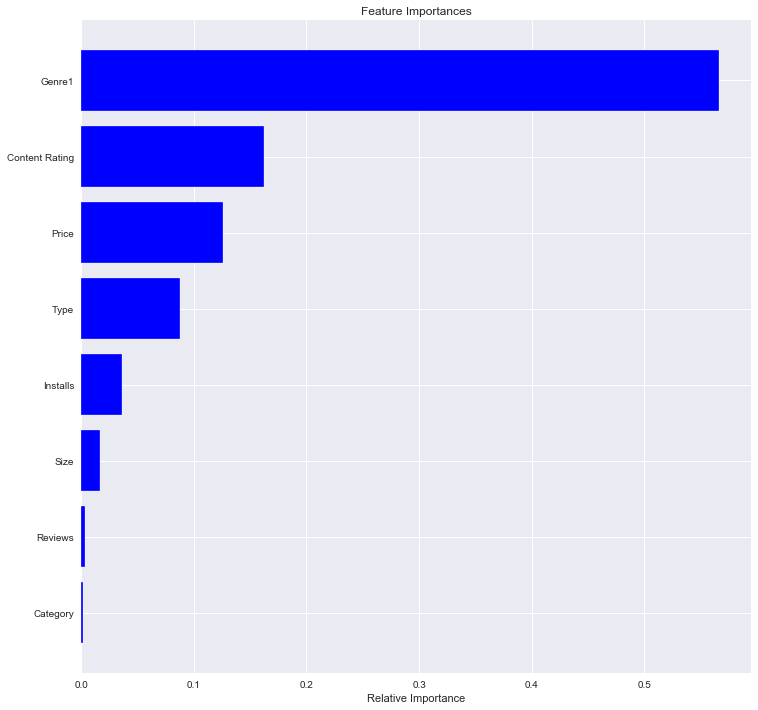

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

- finding the best ensemble

In [109]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
#cv is how many to split training
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

(0.6317070314907253,
 {'max_depth': 15,
  'min_samples_leaf': 12,
  'min_samples_split': 4,
  'n_estimators': 10})

In [110]:
b_model = RandomForestClassifier(max_depth=10,min_samples_leaf=4,min_samples_split=8,n_estimators=30)
b_model.fit(x_train,np.ravel(y_train))
from sklearn.metrics import confusion_matrix
y_pred = b_model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm
b_model.score(x_test,y_test)

0.6289905090595341

#### 4. Bootstrapping

In [111]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(x_train,np.ravel(y_train))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

- accuracy before adjusting model through GridSearchCV

In [112]:
model.score(x_test,y_test)

0.5815358067299397

In [113]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':[i for i in range(10,60,5)], #the number of trees
     'max_samples':[i for i in range(10,60,5)],
     'max_features':[i for i in range(1,8)],
     #'oob_score':np.ravel(y_test)
     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

(0.6294860417822149,
 {'max_features': 3, 'max_samples': 55, 'n_estimators': 40})

In [114]:
model=BaggingClassifier(max_features=5,max_samples=55,n_estimators=40)
model.fit(x_train,np.ravel(y_train))
model.score(x_test,y_test)

0.6289905090595341

#### 5. Three-Layer Neural Network

In [115]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation=tf.nn.relu,
                          input_shape = (X_train.shape[1],)),
        keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.Dense(1,activation='linear')
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae'])
    return model

model = build_model()
#model.fit(X_train, Y_train, epochs=80, batch_size=16, verbose=0)
model.fit(X_train,Y_train,epochs=80, batch_size=16, verbose=0)
score = model.evaluate(X_test,Y_test)
print('score: ',score)

C:\Users\shery\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



1931/1931 [==============================] - 0s 73us/step
score:  [0.409776290669335, 0.4269957309834763]


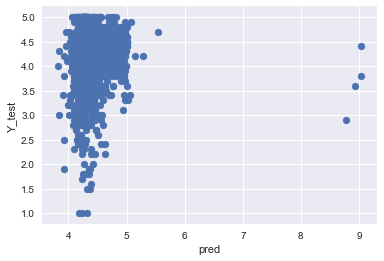

In [116]:
pre = model.predict(X_test)
plt.scatter(pre,Y_test)
plt.xlabel('pred')
plt.ylabel('Y_test')
plt.show()

## Basic sentiment analysis of user reviews

In [117]:
import pandas as pd
import numpy as np
from textblob import TextBlob 

df_sent=pd.read_csv('googleplaystore_user_reviews_1.csv')

In [118]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else: 
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()


<li> Transfer reviews into list

In [119]:
app_review = np.array(df_sent['Translated_Review'])
app_review = app_review.tolist()

<li> Use textblob to do sentiment analysis
 

In [120]:
def get_sentiment_polarity(text):
    r= TextBlob(text).sentiment.polarity
    w = TextBlob(text).sentiment.subjectivity
    if r > 0:
        s = 'Positive'
    elif r == 0:
        s = 'Neutral'
    else:
        s = 'Negative'
    return (s,r,w)



In [121]:
sentiment=[]
sentiment_polarity=[]
sentiment_subjectivity=[]
for i in app_review:
    if isinstance(i,str):
        e = get_sentiment_polarity(i)
        sentiment.append(e[0])
        sentiment_polarity.append(e[1])
        sentiment_subjectivity.append(e[2])
    else:
        sentiment.append(i)
        sentiment_polarity.append(i)
        sentiment_subjectivity.append(i)

<li>Add sentiment, sentiment_polarity and sentiment_subjectivity to df

In [122]:
df_sent['Sentiment'] = pd.DataFrame(sentiment)
df_sent['Sentiment_polarity'] = pd.DataFrame(sentiment_polarity)
df_sent['Sentiment_subjectivity']= pd.DataFrame(sentiment_subjectivity)

In [123]:
df_sent

,App,Translated_Review,Sentiment,Sentiment_polarity,Sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


### Draw sentiment graph

In [124]:
import plotly
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})



In [125]:
df_2 = pd.merge(df, df_sent, on = "App", how = "inner")
df_2 = df_2.dropna(subset=['Sentiment', 'Translated_Review'])
grouped_sentiment_count = df_2.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_sum = df_2.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
new_df = pd.merge(grouped_sentiment_count, grouped_sentiment_sum, on=["Category"])

new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)

trace1 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[::3],
    name='Negative',
    marker=dict(color = 'rgb(158,202,225)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[1::3],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[2::3],
    name='Positive',
    marker=dict(color = 'rgb(8,48,107)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

<b> CONCLUSION</b>
<li> According to the graph above, <b>Comics </b> apps perform the best, having about 90% positive review.
<li> On the other hand, <b>Game</b> apps perform most terrible, with about 50% positive and 50% negative and neutral.

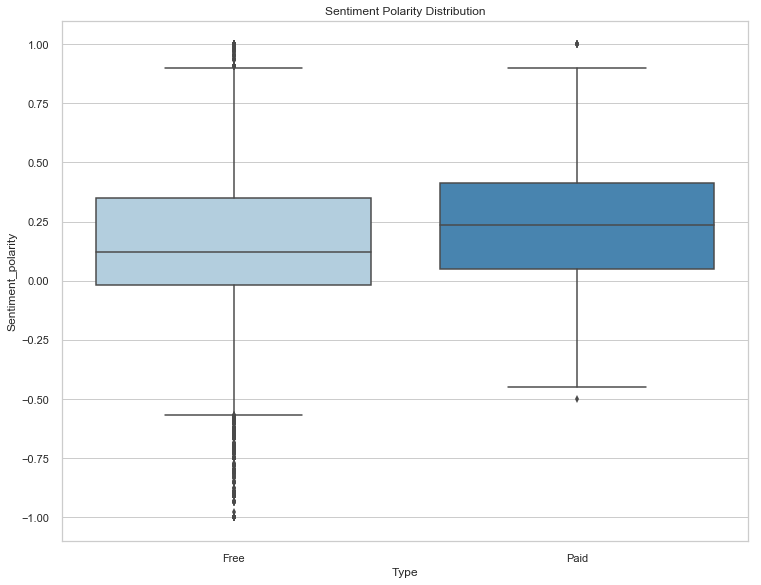

In [126]:
sns.set_style('ticks',{"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12.3, 9.57)
ax = sns.boxplot(x='Type', y='Sentiment_polarity', data=df_2,palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')

<b> CONCLUSION</b>
<li> Free apps received much more extreme comments which are indicated as the outliers on the negative Y-axis.
<li> Paid apps received more tolerant and moderate reviews - people will not give extreme comments to the paid apps.

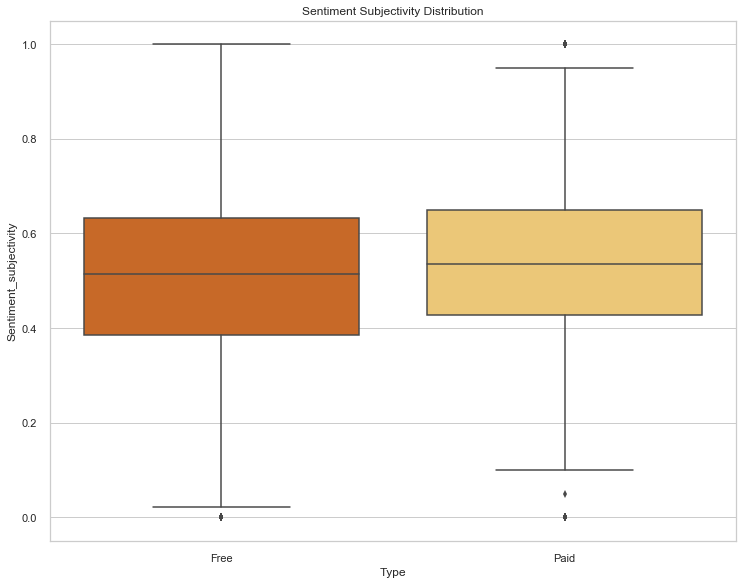

In [127]:
sns.set_style('ticks',{"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12.3, 9.57)
ax = sns.boxplot(x='Type', y='Sentiment_subjectivity', data=df_2, palette='YlOrBr_r')
title = ax.set_title('Sentiment Subjectivity Distribution')

<b> CONCLUSION</b>
<li> Reviews of both free apps and paid apps are almost fairly subjective; 
<li> Paid apps are a little more subjective.

### Generate wordcloud

In [128]:
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
stop = STOPWORDS

wc = WordCloud(background_color="white", max_words=2000, stopwords=stop, colormap="Set2")

df_2.Translated_Review = df_2.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
df_2.dropna(subset=['Translated_Review'], inplace=True)


<li><b>The wordcloud of free apps

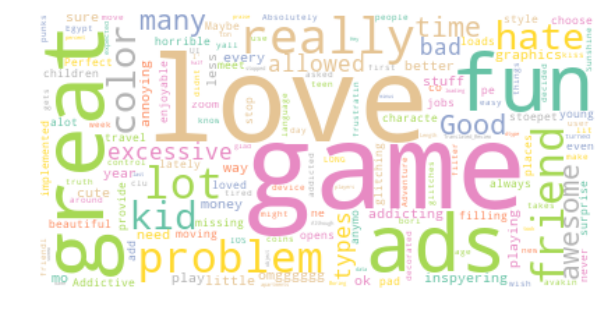

In [129]:
free = df_2.loc[df_2.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> CONCLUSION OF FREE APPS</b>
<li> Positive words: love, good, great
<li> Negative words: ads, hate, bad

<li><b>The workdcloud of paid apps

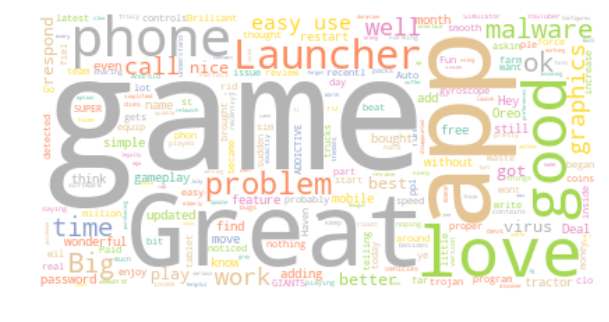

In [130]:
paid = df_2.loc[df_2.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> CONCLUSION OF PAID APPS</b>
<li> Positive words: great, love, good
<li> Negative words: problem, malware

## Topic analysis

### Import for topic analysis

In [131]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
import gensim.summarization
import matplotlib.pyplot as plt
import seaborn as sns
import gc

C:\Users\shery\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



### Delete the rows having NaN and build topic_graph function

In [132]:
df_new = df_sent.dropna(axis=0, how='any')
df_new.reset_index(inplace =True)

In [133]:
def topic_graph(df):
    reviews_list = []
    for i in range(len(df)):
        r = df['Translated_Review'][i]
        reviews_list.append(r)
    for i in range(len(reviews_list)):
        review = reviews_list[i]
        sents = sent_tokenize(review)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    reviews_list[i] = '. '.join(sents)
    
    texts = [[word for word in review.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate']  #remove numbers and not words
        for review in reviews_list]
    dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
    corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
    num_topics = 1 #The number of topics that should be generated
    passes = 10
    lda = LdaModel(corpus,
                  id2word=dictionary,
                  num_topics=num_topics,
                  passes=passes)

    tp = lda.top_topics(corpus,topn=5,dictionary=dictionary)
    return tp

#### Graphing the top apps from the top 5 categories.

<li> Choose the best performing apps in the top 5 best performing categories.

In [134]:
category_list = ['EDUCATION', 'ART_AND_DESIGN', 'ENTERTAINMENT','GAME','COMICS']

app_list=[]
for i in category_list:
    x = df_2[df_2['Category']==i].sort_values(by = ['Rating'], ascending = False)
    r = np.array(x[0:1]).tolist()
    app_list.append((i,r[0][0]))

In [135]:
df_edu = df_new[df_new['App']=='Duolingo: Learn Languages Free']
df_edu.reset_index(inplace =True)
df_art = df_new[df_new['App']=='Colorfit - Drawing & Coloring']
df_art.reset_index(inplace =True)
df_enter=df_new[df_new['App']=='Fandango Movies - Times + Tickets']
df_enter.reset_index(inplace =True)
df_game=df_new[df_new['App']=='Bowmasters']
df_game.reset_index(inplace =True)
df_comics = df_new[df_new['App']=='Best Wallpapers Backgrounds(100,000+ 4K HD)']
df_comics.reset_index(inplace =True)
df_list = []
df_list.append(df_edu)
df_list.append(df_art)
df_list.append(df_enter)
df_list.append(df_game)
df_list.append(df_comics)

In [136]:
results = []
for w in df_list:
    result = topic_graph(w)
    results.append(result)

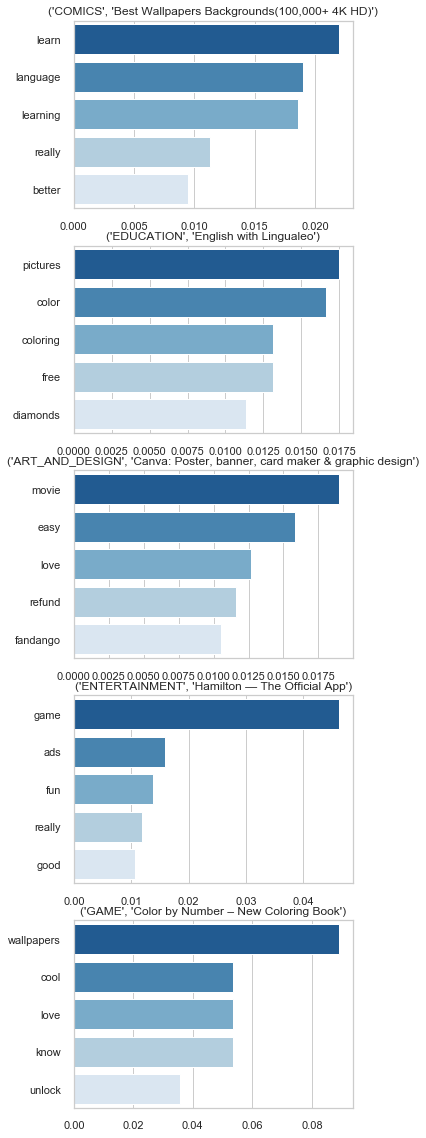

In [137]:
f,ax = plt.subplots(5,1,figsize = (5,20))

for i in range(5):
# sns.barplot(label,value,palette='RdBu_r', ax=ax1)
    ax[i].set_title(app_list[i-1])
    label = [] 
    value = []
    for j,k in results[i][0][0]:
        label.append(j)
        value.append(k)
    sns.barplot(label,value, ax= ax[i], palette='Blues_r');

## Conclusion

Based on our comprehensive analysis from various market segments, we conclude with two strategies for potential entrants into the Google Play Store market space. 
User based:
-	We advise companies to focus on app size and genre definition prior to app launch, as it exhibits prominent feature importance, and we hypothesize that Google Play Store makes heavy use of genre and category during user app recommendation.
-	New entrants are recommended to begin with designing functional or self-improvement type apps due to their overall popularity and the fact that they may cater to a more receiving user base.
-	We advise against shying away from pricing apps, because priced apps exhibit an overall higher average rating and cater to a more moderate user base.
Market based:
-	We recommend developers who want to follow market trends to maintain an app size of around 28-38MB if they plan on charging users a small fee between 2-4 USD.
-	Apps in the Family and Medical category may be priced above average.
